In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [2]:
import zipfile
import os

In [3]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
data_dir = "C:/Users/16399/Downloads/covid/ways"

In [5]:
os.listdir(data_dir)

['test', 'train']

In [6]:
# finding classes in training set
train_dir = data_dir+"/train"
os.listdir(train_dir)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [7]:
# finding classes in testing set
test_dir = data_dir+"/test"
os.listdir(test_dir)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [8]:
len(os.listdir(train_dir+"/COVID19"))

460

In [9]:
len(os.listdir(train_dir+"/NORMAL"))

1266

In [10]:
len(os.listdir(train_dir+"/PNEUMONIA"))

3418

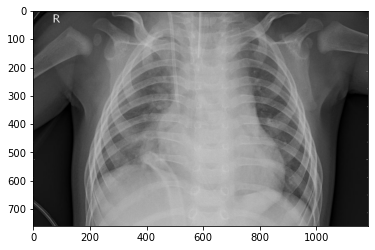

In [11]:
#observing train dataset
pneumonia_sample = imread(train_dir+"/PNEUMONIA"+"/PNEUMONIA(3189).jpg")
plt.imshow(pneumonia_sample)

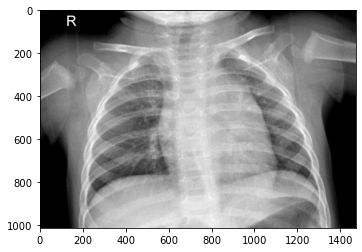

In [12]:
normal_sample = imread(train_dir+"/NORMAL"+"/NORMAL(342).jpg")
plt.imshow(normal_sample)

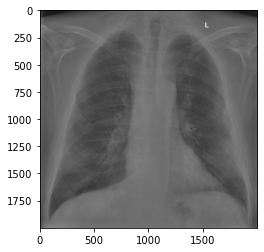

In [13]:
covid_sample = imread(train_dir+"/COVID19"+"/COVID19(189).jpg")
plt.imshow(covid_sample, cmap= "gray")

In [14]:
#observing dimensions of training set
covid_sample.shape

(2000, 2000)

In [15]:
pneumonia_sample.shape

(760, 1184, 3)

In [16]:
normal_sample.shape

(1013, 1472, 3)

In [17]:
#taking dimension of biggest training set
dim1 = []
dim2 = []

for image_name in os.listdir(train_dir+"/PNEUMONIA"):
    img = imread(train_dir+"/PNEUMONIA/"+image_name)
    d1,d2,c = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\16399\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


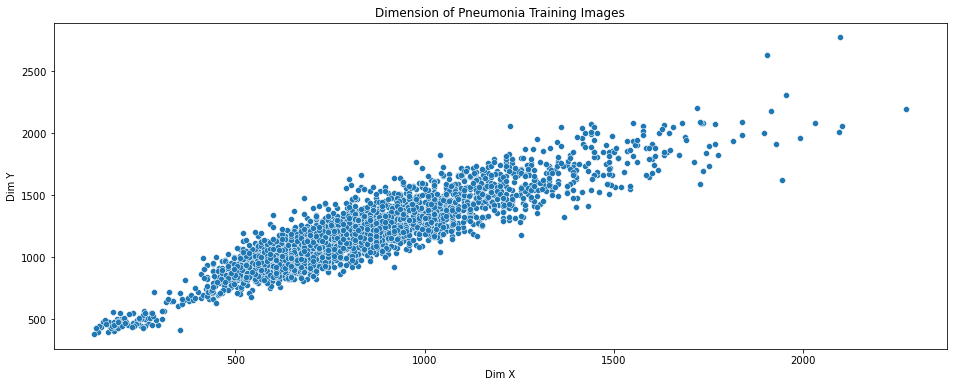

In [18]:
plt.figure(figsize=(16,6))
sns.scatterplot(dim1, dim2)
plt.title('Dimension of Pneumonia Training Images') #title
plt.xlabel('Dim X') #x label
plt.ylabel('Dim Y') #y label
plt.show()

In [19]:
np.mean(dim1)

828.5772381509655

In [20]:
np.mean(dim2)

1189.5617320070216

In [21]:
#setting average dim
average_image_size = (400,400,3)

In [24]:
# preparing for data augmentation
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False, 
    vertical_flip=False,
    rescale=1/255,
)

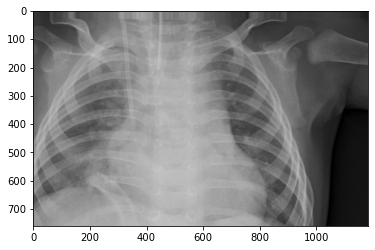

In [25]:
#observing the output of generator
plt.imshow(generator.random_transform(pneumonia_sample))

In [26]:
generator.flow_from_directory(test_dir)

Found 1288 images belonging to 3 classes.


In [27]:
generator.flow_from_directory(train_dir)

Found 5144 images belonging to 3 classes.


In [28]:
# augmentation of train and test set 
train_generator = generator.flow_from_directory (
    train_dir,
    target_size=average_image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


In [29]:
test_generator = generator.flow_from_directory (
    test_dir,
    target_size=average_image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [31]:
#assigning early stopping
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [32]:
#creating model
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (1,1), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (1,1), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, padding = "same", kernel_size = (3,3), strides = (1,1), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 132, activation = "relu"))
model.add(Dense(units = 60, activation = "relu"))
model.add(Dense(units = 3, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [33]:
#training model
model.fit_generator(train_generator, validation_data=test_generator, epochs=100, callbacks=[stop])

C:\Users\16399\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
161/161 [==============================] - 449s 3s/step - loss: 0.9784 - accuracy: 0.6950 - val_loss: 0.3956 - val_accuracy: 0.8665
Epoch 2/100
161/161 [==============================] - 439s 3s/step - loss: 0.3661 - accuracy: 0.8585 - val_loss: 0.3909 - val_accuracy: 0.8657
Epoch 3/100
161/161 [==============================] - 443s 3s/step - loss: 0.3285 - accuracy: 0.8828 - val_loss: 0.3526 - val_accuracy: 0.8727
Epoch 4/100
161/161 [==============================] - 436s 3s/step - loss: 0.2997 - accuracy: 0.8850 - val_loss: 0.2472 - val_accuracy: 0.9154
Epoch 5/100
161/161 [==============================] - 439s 3s/step - loss: 0.2630 - accuracy: 0.9036 - val_loss: 0.2354 - val_accuracy: 0.9193
Epoch 6/100
161/161 [==============================] - 437s 3s/step - loss: 0.2298 - accuracy: 0.9134 - val_loss: 0.2511 - val_accuracy: 0.9053
Epoch 7/100
161/161 [==============================] - 472s 3s/step - loss: 0.2219 - accuracy: 0.9211 - val_loss: 0.2779 - val_accuracy:

In [34]:
model.summary()
model.save("extra.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0

In [35]:
model.metrics_names

['loss', 'accuracy']

<AxesSubplot:>

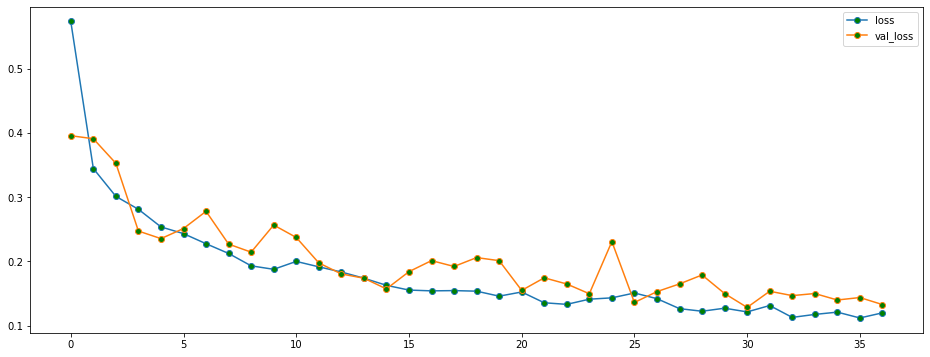

In [36]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

<AxesSubplot:>

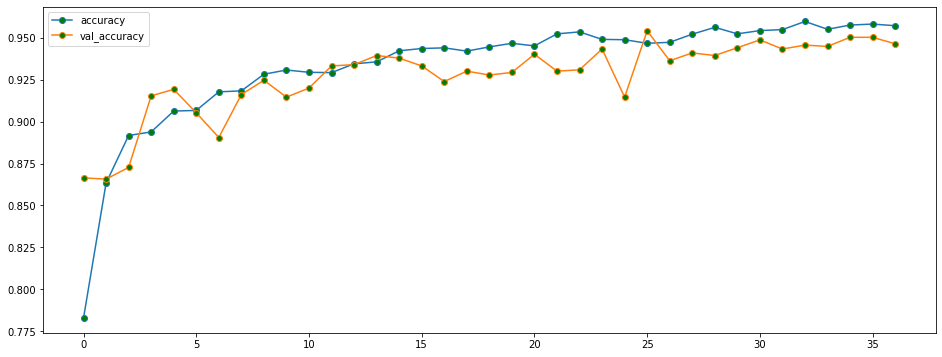

In [37]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

In [38]:
predictions = model.predict(test_generator)

In [39]:
pred_labels = np.argmax(predictions, axis = 1)

In [40]:
len(test_generator.classes)

1288

In [41]:
pred_labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print(classification_report(test_generator.classes, pred_labels))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       116
           1       0.91      0.92      0.92       317
           2       0.97      0.97      0.97       855

    accuracy                           0.96      1288
   macro avg       0.96      0.95      0.96      1288
weighted avg       0.96      0.96      0.96      1288



In [44]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [45]:
from tensorflow.keras.preprocessing import image

In [46]:
from random import randint
random_index = randint(1, len(os.listdir(train_dir+"/COVID19")))
random_covid_image_name = os.listdir(train_dir+"/COVID19")[random_index]

In [47]:
random_covid_image_name

'COVID19(48).jpg'

In [22]:
model= keras.models.load_model("extra.h5")

In [64]:
from random import randint
DIR = test_dir
Folder = 'NORMAL'
i=0
j=0
k=0

#for confusion matrix
y_pred = list()
y_true = list()

for i in range(0,len(os.listdir(DIR+"/"+Folder))):

    random_index = i #randint(1, len(os.listdir(DIR+"/"+Folder)))
    random_covid_image_name = os.listdir(DIR+"/"+Folder)[random_index]
    random_covid_image_name
    print (random_covid_image_name)
    covid_img_path = DIR+"/"+Folder+"/"+random_covid_image_name
    random_covid_img = image.load_img(covid_img_path, target_size=average_image_size)
#     print(covid_img_path)

    random_covid_img_array = image.img_to_array(random_covid_img)
    # print(random_covid_img_array.shape)
    covid_img_array = np.expand_dims(random_covid_img_array, axis=0)
    # print(covid_img_array.shape)
#     print(test_generator.class_indices)
    res = np.argmax(model.predict(covid_img_array), axis =1)
#     print(res)

    #for pneumonia 
    #for confusion matrix
    y_pred.append(res[0])
    y_true.append(2)
    
    if(res[0]==0):
        print('Covid Positive')
        i=i+1
        
    elif(res[0]==1):
        print('Normal')
        j=j+1
    else:
        print('Pnumonia')
        k=k+1
    print('')
print('covid-19 detected',i)
print('normal detected',j)
print('pneumonia detected',k)

NORMAL(1266).jpg
Normal

NORMAL(1267).jpg
Normal

NORMAL(1268).jpg
Normal

NORMAL(1269).jpg
Normal

NORMAL(1270).jpg
Normal

NORMAL(1271).jpg
Normal

NORMAL(1272).jpg
Normal

NORMAL(1273).jpg
Normal

NORMAL(1274).jpg
Normal

NORMAL(1275).jpg
Normal

NORMAL(1276).jpg
Normal

NORMAL(1277).jpg
Normal

NORMAL(1278).jpg
Normal

NORMAL(1279).jpg
Covid Positive

NORMAL(1280).jpg
Normal

NORMAL(1281).jpg
Normal

NORMAL(1282).jpg
Normal

NORMAL(1283).jpg
Normal

NORMAL(1284).jpg
Normal

NORMAL(1285).jpg
Normal

NORMAL(1286).jpg
Normal

NORMAL(1287).jpg
Normal

NORMAL(1288).jpg
Normal

NORMAL(1289).jpg
Covid Positive

NORMAL(1290).jpg
Normal

NORMAL(1291).jpg
Normal

NORMAL(1292).jpg
Normal

NORMAL(1293).jpg
Normal

NORMAL(1294).jpg
Normal

NORMAL(1295).jpg
Normal

NORMAL(1296).jpg
Normal

NORMAL(1297).jpg
Normal

NORMAL(1298).jpg
Normal

NORMAL(1299).jpg
Normal

NORMAL(1300).jpg
Normal

NORMAL(1301).jpg
Normal

NORMAL(1302).jpg
Normal

NORMAL(1303).jpg
Normal

NORMAL(1304).jpg
Normal

NORMAL(13

Label: PNEUMONIA , Predicted: Pneumonia


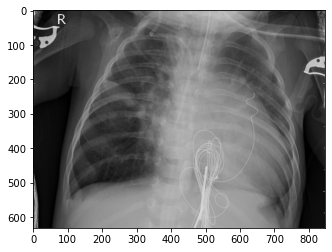

In [41]:
from random import randint
DIR = test_dir
Folder = 'PNEUMONIA'
random_index = randint(1, len(os.listdir(DIR+"/"+Folder)))
random_covid_image_name = os.listdir(DIR+"/"+Folder)[random_index]

covid_img_path = DIR+"/"+Folder+"/"+random_covid_image_name
random_covid_img = image.load_img(covid_img_path, target_size=average_image_size)


random_covid_img_array = image.img_to_array(random_covid_img)
covid_img_array = np.expand_dims(random_covid_img_array, axis=0)
res = np.argmax(model.predict(covid_img_array), axis =1)

if(res[0]==0):
    pred_label = 'Covid Positive'
elif(res[0]==1):
    pred_label = 'Normal'
else:
    pred_label = 'Pneumonia'
    
# print(pred_label)
print('Label:', Folder, ', Predicted:', pred_label)
sample_image = imread(covid_img_path)
plt.imshow(sample_image)